In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
%matplotlib inline

In [5]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [6]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


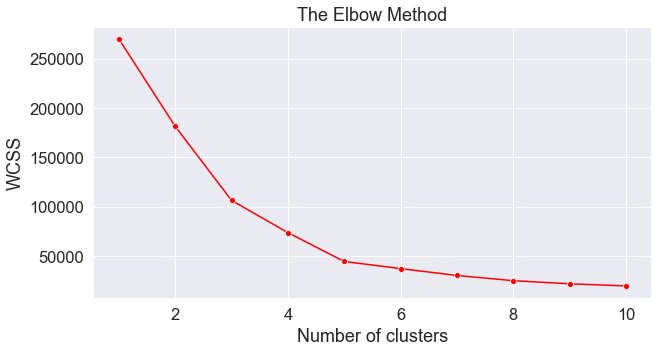

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

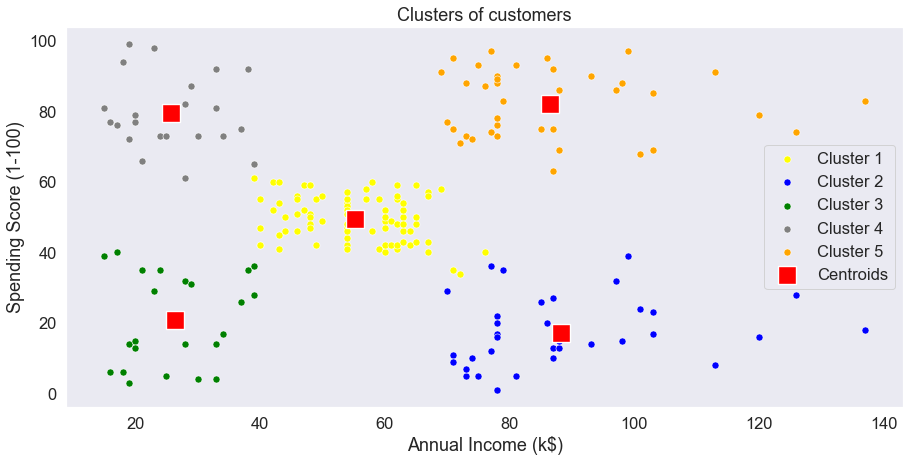

In [18]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
def k_means(k, i_point, data):
    # Initial center
    length = len(data)
    centeriods = {}
    n = 0
    delta = float("inf")
    obj_old = float("inf")

#     # for kmeans without given initial
#     while (len(centeriods) < k):
#         num = np.random.randint(length)
#         if num not in centeriods:
#             x1, x2 = data[num]
#             centeriods[n] = [x1, x2]
#             n += 1

#     # for kmeansPlus
#     centeriods[0] = i_point
    
#     measure = {}
#     select = 0
#     for i in range(1, k):
#         value = 0
#         for j in range(length):
#             check = True
#             for t in centeriods:
#                 if centeriods[t][0] == data[j][0] and centeriods[t][1] == data[j][1]:
#                     check = False
            
#             if check == True:
#                 measure[j] = np.average([np.linalg.norm(data[j] - centeriods[p]) for p in centeriods])
#                 if measure[j] >= value:
#                     value = measure[j]
#                     select = j

#         centeriods[i] = data[select]
# #         print(select)
#     print(centeriods)

    for temp in range(k):
        centeriods[temp] = i_point[temp]
    
    while (delta != 0):
        # grouping
        dist = {}
        match = {}
        for i in range(length):
            score = float("inf")
            for j in centeriods:
                dist[i, j] = np.linalg.norm(data[i] - centeriods[j])
                if dist[i, j] <= score:
                    score = dist[i, j]
                    match[i] = j
        
        obj_new = sum(dist[i, match[i]] for i in match)
        print(obj_new)
        delta = obj_old - obj_new
        print(delta)
        obj_old = obj_new
        loss = sum(dist[i, match[i]]**2 for i in match)

        group = {}
        for i in centeriods:
            group[i] = []
        
        
        for temp in match:
            group[match[temp]].append(temp)
#         print(group)
        cluster = {}
        for i in centeriods:
            cluster[i] = []

        for temp in group:
            for i in group[temp]:
                cluster[temp].append(data[i])

        # new center
        centeriods = {}
        for i in cluster:
            centeriods[i] = np.average(cluster[i], axis=0)
#         print(centeriods)

    return centeriods, loss

In [18]:
centeriods, loss = k_means(k1, i_point1, data)
print(centeriods, loss)

908.656915501
inf
651.62307291
257.03384259
576.856717692
74.7663552187
572.085651687
4.77106600441
570.219746775
1.86590491226
569.886084062
0.333662713352
569.521865488
0.364218573708
568.587702872
0.934162615711
568.266034448
0.321668423922
567.805786175
0.460248273831
567.179552486
0.626233688454
566.593335055
0.58621743091
566.254193798
0.339141257068
566.346820403
-0.092626604633
566.346820403
0.0
{0: array([ 7.23975119,  2.48208269]), 1: array([ 4.83091958,  7.29959959]), 2: array([ 3.23489005,  2.5530322 ])} 1338.10760165


In [ ]:
# for analysis

In [35]:
def k_means_analysis(k, data):
    # Initial center
    length = len(data)
    centeriods = {}
    n = 0
    delta = float("inf")
    obj_old = float("inf")
    selected = []

    # for kmeans without given initial
    while (len(centeriods) < k):
        num = np.random.randint(length)
        if num not in selected:
            x1, x2 = data[num]
            centeriods[n] = [x1, x2]
            n += 1
            selected.append(num)

#     # for kmeansPlus
#     centeriods[0] = i_point
    
#     measure = {}
#     select = 0
#     for i in range(1, k):
#         value = 0
#         for j in range(length):
#             check = True
#             for t in centeriods:
#                 if centeriods[t][0] == data[j][0] and centeriods[t][1] == data[j][1]:
#                     check = False
            
#             if check == True:
#                 measure[j] = np.average([np.linalg.norm(data[j] - centeriods[p]) for p in centeriods])
#                 if measure[j] >= value:
#                     value = measure[j]
#                     select = j

#         centeriods[i] = data[select]
# #         print(select)
#     print(centeriods)

    
    while (delta != 0):
        # grouping
        dist = {}
        match = {}
        for i in range(length):
            score = float("inf")
            for j in centeriods:
                dist[i, j] = np.linalg.norm(data[i] - centeriods[j])
                if dist[i, j] <= score:
                    score = dist[i, j]
                    match[i] = j
        
        obj_new = sum(dist[i, match[i]] for i in match)
#         print(obj_new)
        delta = obj_old - obj_new
#         print(delta)
        obj_old = obj_new
        loss = sum(dist[i, match[i]]**2 for i in match)

        group = {}
        for i in centeriods:
            group[i] = []
        
        
        for temp in match:
            group[match[temp]].append(temp)
#         print(group)
        cluster = {}
        for i in centeriods:
            cluster[i] = []

        for temp in group:
            for i in group[temp]:
                cluster[temp].append(data[i])

        # new center
        centeriods = {}
        for i in cluster:
            centeriods[i] = np.average(cluster[i], axis=0)
    print(loss)

    return centeriods, loss

In [51]:
lossList = []
for k in range(2,11):
    centeriods, loss = k_means_analysis(k, data)
    lossList.append(loss)
    

2498.11356032
1338.17037195
1114.8716283
598.554644366
549.002232349
362.933114045
289.865700814
276.646980876
215.945489279


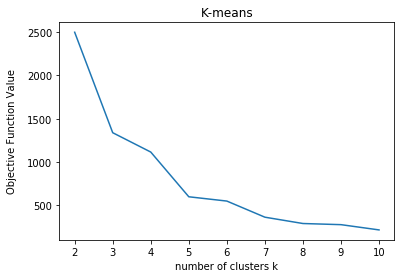

In [52]:
plt.plot(range(2,11), lossList)
plt.xlabel("number of clusters k")
plt.ylabel("Objective Function Value", labelpad=10)
plt.title('K-means')
plt.show()
